<a href="https://colab.research.google.com/github/Weedmike26/CAP2751/blob/main/CAP2751_Assignment1_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 2751 - Tools for Data Science
***Include the following info by clicking here:***
* Name: Weed Mike Origene
* Canvas Course Section: CAP 2751
* Date: 06/08/2025
* Link to your Notebook: https://colab.research.google.com/drive/1Cn2Dju2_5UzaosJyWBb2pQ1iGLQwNpwf?usp=sharing

# Assignment 1: Exploratory Data Analysis (EDA)
## STARTER

### Goals

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets.
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc.

---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway

sns.set(style="ticks", palette="Set2")
%matplotlib inline

# Mount Google Drive (skip if data are local)
from google.colab import drive
drive.mount('/content/drive')
Part 1 – Salaries

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
#salaries = pd.read_csv('./data/salaries.csv')
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


earn – Earnings or salary (presumably annual income, in U.S. dollars)

height – Height of the individual (in inches)

sex – Gender of the individual (categorical; e.g., "male", "female")

ed – Years of education completed

age – Age of the individual (in years)

race – Race or ethnicity (categorical; likely coded numerically or with labels)

In [ ]:
import pandas as pd

# Load the dataset
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')

# Display the first few rows of the dataset
salaries.head()
# inspired by ----- url

*Enter your text here*

*   earn = salary (presumably annual, in USD)
*   height = height (inch)





--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics.

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


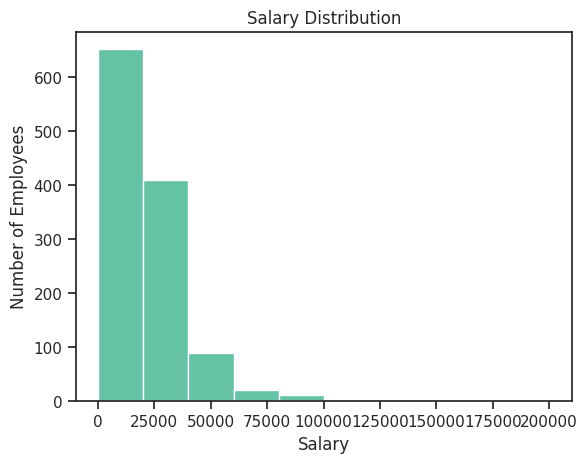

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

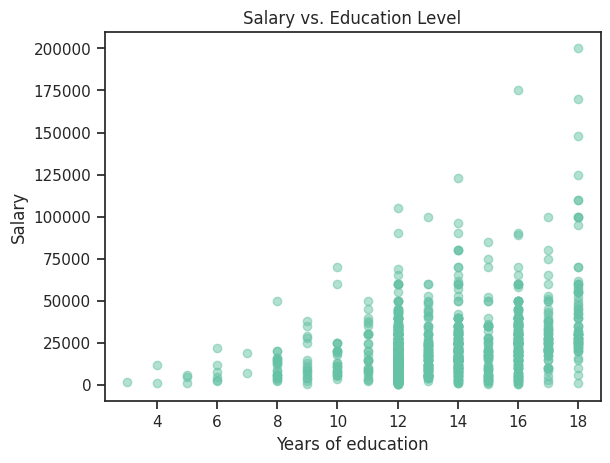

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:
## headcount
total = len(salaries)
gender_counts = salaries['sex'].value_counts()
gender_pct = gender_counts / total * 100
display(pd.DataFrame({'count': gender_counts, 'percent': gender_pct.round(1)}))

## salary stats per gender
salary_stats = (salaries
                .groupby('sex')['earn']
                .agg(['min','max','mean','median'])
                .round(2))
display(salary_stats)

## BONUS – distribution viz
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=salaries, x='sex', y='earn', ax=ax[0])
ax[0].set_title('Salary by Gender')
sns.kdeplot(data=salaries, x='earn', hue='sex', ax=ax[1], common_norm=False, fill=True, alpha=.4)
ax[1].set_title('Density of Salaries')
plt.tight_layout()

*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc..

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not).

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots.

**Weight**: 18 pts, i.e., 6 pts per hypothesis.
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

H1:

In [ ]:
r_age, p_age = pearsonr(salaries['age'], salaries['earn'])
print(f"Pearson r = {r_age:.3f}  (p = {p_age:.4g})")

H2:

In [ ]:
mearn = salaries.loc[salaries.sex=='male','earn']
fearn = salaries.loc[salaries.sex=='female','earn']
t,p = ttest_ind(mearn, fearn, equal_var=False)
print(f"Mean diff = ${mearn.mean()-fearn.mean():.0f};  t = {t:.2f},  p = {p:.4g}")

H3:

In [ ]:
race_groups = [g['earn'].values for _, g in salaries.groupby('race')]
F,p = f_oneway(*race_groups)
print(f"ANOVA F = {F:.2f}, p = {p:.4g}")

-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model.

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

<ipython-input-10-4a6d48b4152a>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",


(406, 9)


In [ ]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [ ]:
cnt3  = (auto.cylinders == 3).sum()
cnt5  = (auto.cylinders == 5).sum()
print(f"3-cyl: {cnt3}   5-cyl: {cnt5}")

*Enter your text here*

--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption.

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

sns.scatterplot(data=auto, x='displacement', y='mpg', ax=ax[0], alpha=.6)
ax[0].set_title('MPG vs displacement')

sns.scatterplot(data=auto, x='weight', y='mpg', ax=ax[1], alpha=.6)
ax[1].set_title('MPG vs weight')

sns.scatterplot(data=auto, x='horsepower', y='mpg', ax=ax[2], alpha=.6)
ax[2].set_title('MPG vs horsepower')

plt.tight_layout()

*Enter your text here*

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not).

**Weight**: 20 pts, i.e., 10 pts per hypothesis.
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.

Hint:

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



In [ ]:
# helper columns
auto['year']   = auto['modelyear'] + 1900   # 70 ➔ 1970, etc.
auto['country'] = auto['origin'].replace({1:'USA',2:'Europe',3:'Japan'})

## H4 – fuel economy over time
sns.boxplot(data=auto, x='year', y='mpg')
plt.xticks(rotation=45); plt.title('MPG distribution by model year')
plt.show()

## H5 – country comparison
sns.boxplot(data=auto, x='country', y='mpg')
plt.title('Fuel efficiency by region of origin')
plt.show()

*Enter your text*

Learned basic EDA workflow: loading data, cleaning, grouping, hypothesis testing, quick viz with Seaborn.

Most fun: visualizing gender pay gap; most tedious: handling missing horsepower values.

With an extra week: build interactive dashboards (Plotly), add regression models, perform formal multiple-comparison tests, and polish the narrative for a publication-quality report.

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

Learned basic EDA workflow: loading data, cleaning, grouping, hypothesis testing, quick viz with Seaborn.

Most fun: visualizing gender pay gap; most tedious: handling missing horsepower values.

With an extra week: build interactive dashboards (Plotly), add regression models, perform formal multiple-comparison tests, and polish the narrative for a publication-quality report.*Enter your conclusions here*
